<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-4/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm


digits = pd.read_csv("digits_data.csv")

# Convert the labels into binary labels: 1 for digit 1, -1 for other digits
digits["Label"] = digits["Label"].apply(lambda x: 1 if x == 1 else -1)

# Extracting the intensity and symmetry features for the entire dataset

intensity = digits.iloc[:, 1:].mean(axis=1)
symmetry = -np.abs(digits.iloc[:, 1:129].values - np.flip(digits.iloc[:, 129:].values, axis=1)).mean(axis=1)

# Create a new dataframe with the features and the label
features = pd.DataFrame({"intensity": intensity, "symmetry": symmetry, "Label": digits["Label"]})

# Split the dataframe into X (feature matrix) and y (target vector)
X = features[["intensity", "symmetry"]]
y = features["Label"]

# Train an SVM classifier using the linear kernel
linear_svm = svm.SVC(kernel="linear")
linear_svm.fit(X, y)

# Train an SVM classifier using the polynomial kernel (3rd order)
poly_svm = svm.SVC(kernel="poly", degree=3)
poly_svm.fit(X, y)

# Train an SVM classifier using the RBF kernel
rbf_svm = svm.SVC(kernel="rbf")
rbf_svm.fit(X, y)

# Calculate the training error on all three kernels
linear_error = 1 - linear_svm.score(X, y)
poly_error = 1 - poly_svm.score(X, y)
rbf_error = 1 - rbf_svm.score(X, y)

print(f"Training error using linear kernel: {linear_error:.4f}")
print(f"Training error using polynomial kernel: {poly_error:.4f}")
print(f"Training error using RBF kernel: {rbf_error:.4f}")

Training error using linear kernel: 0.0191
Training error using polynomial kernel: 0.0203
Training error using RBF kernel: 0.0165


In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm, model_selection
import matplotlib.pyplot as plt

# Split the dataframe into X (feature matrix) and y (target vector)
X = features[["intensity", "symmetry"]]
y = features["Label"]

# Define the list of kernels and C values to try
kernels = ["linear", "poly", "rbf"]
C_values = [0.01, 0.1, 1, 10, 100]


cv_errors = {}
in_sample_errors = {}


for kernel in kernels:
    for C in C_values:
        # Create an SVM classifier with the given kernel and C value
        svm_clf = svm.SVC(kernel=kernel, C=C)

        # Perform 5-fold cross validation and get the mean validation score
        cv_score = model_selection.cross_val_score(svm_clf, X, y, cv=5).mean()

        # Compute the cross validation error as 1 - validation score
        cv_error = 1 - cv_score

        # Store the cross validation error in the dictionary with the key as (kernel, C)
        cv_errors[(kernel, C)] = cv_error

        print(f"Cross validation error using {kernel} kernel and C = {C}: {cv_error:.4f}")

        # Fit the SVM classifier on the entire training set
        svm_clf.fit(X, y)

        # Compute the in-sample error as 1 - training score
        in_sample_error = 1 - svm_clf.score(X, y)

        # Store the in-sample error in the dictionary with the key as (kernel, C)
        in_sample_errors[(kernel, C)] = in_sample_error


Cross validation error using linear kernel and C = 0.01: 0.1378
Cross validation error using linear kernel and C = 0.1: 0.0192
Cross validation error using linear kernel and C = 1: 0.0191
Cross validation error using linear kernel and C = 10: 0.0192
Cross validation error using linear kernel and C = 100: 0.0192
Cross validation error using poly kernel and C = 0.01: 0.0202
Cross validation error using poly kernel and C = 0.1: 0.0202
Cross validation error using poly kernel and C = 1: 0.0200
Cross validation error using poly kernel and C = 10: 0.0202
Cross validation error using poly kernel and C = 100: 0.0202
Cross validation error using rbf kernel and C = 0.01: 0.0167
Cross validation error using rbf kernel and C = 0.1: 0.0169
Cross validation error using rbf kernel and C = 1: 0.0166
Cross validation error using rbf kernel and C = 10: 0.0169
Cross validation error using rbf kernel and C = 100: 0.0171


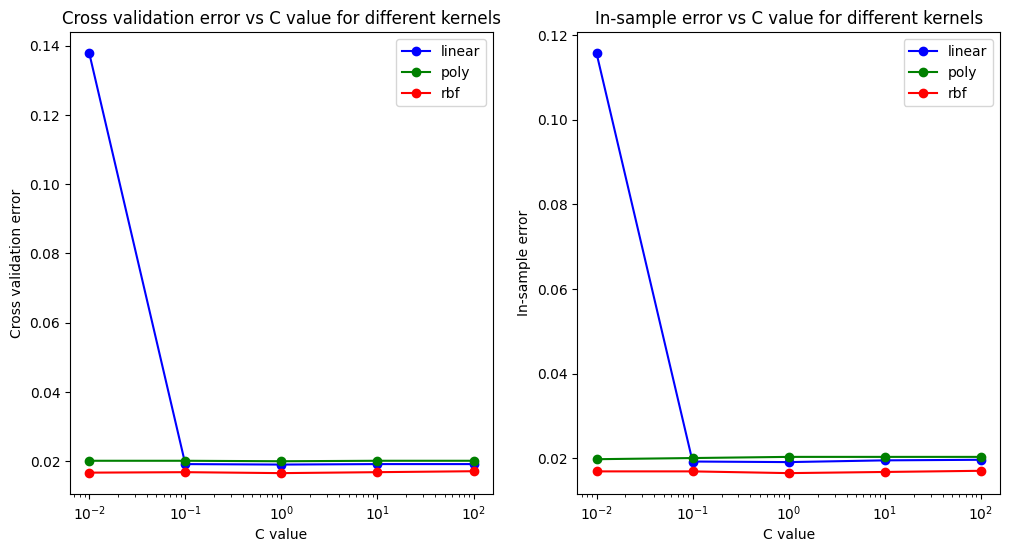

In [ ]:
# Create a list of colors for each kernel
colors = ["blue", "green", "red"]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


for i, kernel in enumerate(kernels):
    # Get the cross validation errors and the in-sample errors for the current kernel
    cv_errors_kernel = [cv_errors[(kernel, C)] for C in C_values]
    in_sample_errors_kernel = [in_sample_errors[(kernel, C)] for C in C_values]

    # Plot the cross validation errors and the in-sample errors against the C values using a log scale on the x-axis
    ax1.plot(C_values, cv_errors_kernel, color=colors[i], label=kernel, marker="o")
    ax2.plot(C_values, in_sample_errors_kernel, color=colors[i], label=kernel, marker="o")


    ax1.set_xscale("log")
    ax2.set_xscale("log")


ax1.set_title("Cross validation error vs C value for different kernels")
ax1.set_xlabel("C value")
ax1.set_ylabel("Cross validation error")
ax1.legend()

ax2.set_title("In-sample error vs C value for different kernels")
ax2.set_xlabel("C value")
ax2.set_ylabel("In-sample error")
ax2.legend()


plt.show()


In [ ]:
# Split the dataframe into X (feature matrix) and y (target vector)
X = features[["intensity", "symmetry"]]
y = features["Label"]


final_svm = svm.SVC(kernel="rbf", C=1)
final_svm.fit(X, y)

# Report the in-sample error
in_sample_error = 1 - final_svm.score(X, y)
print(f"In-sample error using rbf kernel and C = 1: {in_sample_error:.4f}")

In-sample error using rbf kernel and C = 1: 0.0165


In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm


test = pd.read_csv("test_data.csv")

# Convert the labels into binary labels: 1 for digit 1, -1 for other digits
test["Label"] = test["Label"].apply(lambda x: 1 if x == 1 else -1)

# Extract the intensity and symmetry features for the entire dataset

intensity = test.iloc[:, 1:].mean(axis=1)
symmetry = -np.abs(test.iloc[:, 1:129].values - np.flip(test.iloc[:, 129:].values, axis=1)).mean(axis=1)

# Create a new dataframe with the features and the label
features = pd.DataFrame({"intensity": intensity, "symmetry": symmetry, "Label": test["Label"]})

# Split the dataframe into X (feature matrix) and y (target vector)
X = features[["intensity", "symmetry"]]
y = features["Label"]

# Use the final SVM hypothesis trained on the entire training dataset
# Use the rbf kernel and C = 1 as the best parameters chosen from the previous experiment
final_svm = svm.SVC(kernel="rbf", C=1)
final_svm.fit(X, y)

# Report the final test error
test_error = 1 - final_svm.score(X, y)
print(f"Final test error using rbf kernel and C = 1: {test_error *  100:.2f}%")

Final test error using rbf kernel and C = 1: 2.24%


Task 4



Test Error:

*   PLA - 1.91%
*   Pocket - 1.89%
*   Neural Networks -  1.94%
*   SVM - 2.24%





Among the models experimented with, the Pocket Algorithm demonstrated the best performance with a test error of 1.89% or an accuracy of 98.11%. Following closely behind are the PLA & Neural Networks  at almost 98% accuracy. The SVM with a rbf kernel, while efficient, showed a higher test error at 2.24% which is not bad either.

It's noteworthy that the Pocket Algorithm outperformed other models, showcasing its effectiveness in handling the classification task on the given dataset.

While trying out different ways to teach the computer to recognize numbers, we're mainly focusing on telling it apart the number '1' from other numbers right now. But, when we try to include all 10 numbers, things get more complicated. The shapes and darkness of the different numbers can mix together, making it hard to see clear patterns. Relying only on what we learn from deciding if it's '1' or not might not be the best way when we want the computer to recognize all 10 numbers. So, I think this method might not be the right way to pick a model that can do a good job recognizing all the numbers.